# Phonepay Project

### Project Overview:
This case study focuses on analyzing transaction data from the PhonePe financial application, combined with demographic data across various states and districts in India. The datasets cover multiple years and quarters, offering a detailed view of transaction trends, user behavior, and demographic insights.

### Objectives:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Data Loading and Understanding

In [4]:
df_state_txn=pd.read_excel('phonepay.xlsx', sheet_name='State_Txn and Users')
df_transc=pd.read_excel('phonepay.xlsx', sheet_name='State_TxnSplit')
df_brand=pd.read_excel('phonepay.xlsx', sheet_name='State_DeviceData')
df_dist_cd=pd.read_excel('phonepay.xlsx', sheet_name='District_Txn and Users')
df_dist=pd.read_excel('phonepay.xlsx', sheet_name='District Demographics')

In [5]:
df_inf={'df1':df_state_txn,
    'df2':df_transc,
    'df3':df_brand,
    'df4':df_dist_cd,
    'df5':df_dist}

#### 1.1 Shape of each dataframe

In [7]:
for key,df in df_inf.items():
    print(f"The DataFrame '{key}' contains {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame 'df1' contains 504 rows and 8 columns.
The DataFrame 'df2' contains 2514 rows and 7 columns.
The DataFrame 'df3' contains 5544 rows and 6 columns.
The DataFrame 'df4' contains 10248 rows and 10 columns.
The DataFrame 'df5' contains 742 rows and 8 columns.


#### 1.3 First 5 rows of State Transaction Data

In [9]:
df_state_txn.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


#### 1.4 Last 10 rows of State Transaction Split Data

In [11]:
df_transc.tail(10)

,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


#### 1.5 Middle 10 rows of State Device Data

In [13]:
middle_rows=len(df_brand)//2

In [14]:
df_brand.iloc[middle_rows:middle_rows+10,:]

,State,Year,Quarter,Brand,Registered Users,Percentage
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900
2777,Lakshadweep,2018,1,OnePlus,22,0.043912
2778,Lakshadweep,2018,1,Apple,20,0.039920
2779,Lakshadweep,2018,1,Realme,20,0.039920
2780,Lakshadweep,2018,1,Gionee,12,0.023952
2781,Lakshadweep,2018,1,COOLPAD,10,0.019960


#### 1.6 First 10 Rows of District Transactions Data

In [16]:
df_dist_cd.head(10)

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


#### 1.6 Last 10 Rows of District Transactions Data

In [18]:
df_dist_cd.tail(10)

,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
10238,West Bengal,2021,2,Murshidabad,WB14,8602251,1.999694e+10,2324.616616,1248602,16530655
10239,West Bengal,2021,2,Nadia,WB15,5524174,1.122758e+10,2032.445525,955428,13665885
10240,West Bengal,2021,2,North Twenty Four Parganas,WB16,17258291,3.041482e+10,1762.331031,2660664,37899453
10241,West Bengal,2021,2,Paschim Bardhaman,WB17,4893774,8.731263e+09,1784.157359,789026,10545670
10242,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,1.030351e+10,2039.558976,856640,16201033
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7.572502e+09,1931.401639,787970,12128849
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,1.515507e+10,2361.146027,946277,15491958
10245,West Bengal,2021,2,Purulia,WB21,1895981,2.790996e+09,1472.059252,435131,8843358
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,1.339853e+10,2011.243709,1286588,19344293
10247,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5.564221e+09,2469.272118,392388,8184990


#### 1.7 Every 10th row of District Demographics Data

In [22]:
df_dist.iloc[::10,:]

,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


#### 1.8 Statistical Data of all the DataFrames

In [32]:
for key,df in df_inf.items():
    print(f"\nSummary statistics for '{key}':\n\n{df.describe()}")


Summary statistics for 'df1':

              Year     Quarter  Transactions  Amount (INR)    ATV (INR)  \
count   504.000000  504.000000  5.040000e+02  5.030000e+02   504.000000   
mean   2019.285714    2.357143  4.074000e+07  7.083332e+10  1993.471543   
std       1.031181    1.109971  8.228714e+07  1.440902e+11   607.464894   
min    2018.000000    1.000000  7.780000e+02  1.928611e+06     0.000000   
25%    2018.000000    1.000000  5.925578e+05  1.167157e+09  1598.910667   
50%    2019.000000    2.000000  6.217487e+06  1.051605e+10  1861.380589   
75%    2020.000000    3.000000  4.363675e+07  6.947045e+10  2259.087924   
max    2021.000000    4.000000  5.736165e+08  1.027958e+12  3938.733850   

       Registered Users     App Opens  
count      5.040000e+02  5.040000e+02  
mean       4.777501e+06  9.774471e+07  
std        6.644496e+06  2.042376e+08  
min        5.010000e+02  0.000000e+00  
25%        1.574202e+05  0.000000e+00  
50%        1.747914e+06  2.930574e+06  
75%        7

### 1.9 The datatypes of each columns in all the dataframes

In [35]:
for key, df in df_inf.items():
    print(f"\nThe datatypes of each column in {key} are: \n")
    df.info()


The datatypes of each column in df1 are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             504 non-null    object 
 1   Year              504 non-null    int64  
 2   Quarter           504 non-null    int64  
 3   Transactions      504 non-null    int64  
 4   Amount (INR)      503 non-null    float64
 5   ATV (INR)         504 non-null    float64
 6   Registered Users  504 non-null    int64  
 7   App Opens         504 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 31.6+ KB

The datatypes of each column in df2 are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             2514 non-null   object 
 1   Year              2514 

#### 1.11 Total Missing Values in each dataframes

In [38]:
for key, df in df_inf.items():
    print(f"\nTotal Missing Values in {key} are: \n{df.isnull().sum()}")


Total Missing Values in df1 are: 
State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64

Total Missing Values in df2 are: 
State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64

Total Missing Values in df3 are: 
State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64

Total Missing Values in df4 are: 
State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64

Total Missing Values in df5 are: 
State             0
District          0
Headquarters      0
Population        0
A

#### 1.11 Percentage of total Missing Values in each dataframes

In [41]:
for key, df in df_inf.items():
    print(f"\nTotal Percentage of Missing Values in {key} are: \n{df.isnull().mean()*100}")


Total Percentage of Missing Values in df1 are: 
State               0.000000
Year                0.000000
Quarter             0.000000
Transactions        0.000000
Amount (INR)        0.198413
ATV (INR)           0.000000
Registered Users    0.000000
App Opens           0.000000
dtype: float64

Total Percentage of Missing Values in df2 are: 
State               0.0
Year                0.0
Quarter             0.0
Transaction Type    0.0
Transactions        0.0
Amount (INR)        0.0
ATV (INR)           0.0
dtype: float64

Total Percentage of Missing Values in df3 are: 
State               0.0
Year                0.0
Quarter             0.0
Brand               0.0
Registered Users    0.0
Percentage          0.0
dtype: float64

Total Percentage of Missing Values in df4 are: 
State               0.000000
Year                0.000000
Quarter             0.000000
District            0.000000
Code                0.273224
Transactions        0.000000
Amount (INR)        0.000000
ATV (INR)   

### 1.11 Identifying the highest Percentage Missing Value column in each DataFrame

In [44]:
for key, df in df_inf.items():
    column= df.isna().mean().idxmax()
    print(f"\nHighest percentage missing value column in Dataframe {key} is {column} and missing % is: {df[column].isna().mean()*100} %")


Highest percentage missing value column in Dataframe df1 is Amount (INR) and missing % is: 0.1984126984126984 %

Highest percentage missing value column in Dataframe df2 is State and missing % is: 0.0 %

Highest percentage missing value column in Dataframe df3 is State and missing % is: 0.0 %

Highest percentage missing value column in Dataframe df4 is Code and missing % is: 0.273224043715847 %

Highest percentage missing value column in Dataframe df5 is State and missing % is: 0.0 %


### 1.12 Identifying the total number of unique states and districts

In [47]:
Total_States=df_dist_cd['State'].nunique()
Total_Districts=df_dist_cd['District'].nunique()
print(f"The total no. of Unique States are: {Total_States}")
print(f"The total no. of Unique Districts are: {Total_Districts}")

The total no. of Unique States are: 36
The total no. of Unique Districts are: 723


### 1.12 State with highest number of districts 

In [50]:
df_dist_cd.groupby('State')['District'].nunique().idxmax()

'Uttar Pradesh'

In [52]:
#state with highest occurence of districts
df_dist_cd['State'].value_counts().idxmax()

'Uttar Pradesh'

## 2. Exploratoty Data Analysis

## 2.1Analyze transaction trends over the years for each state

### 2.11 the total number of transactions and total transaction amount for each state over the years

In [57]:
total_transc= df_state_txn.groupby(['State','Year'])[['Transactions','Amount (INR)']].sum()

In [59]:
ttl_transc=total_transc.reset_index()

In [61]:
ttl_transc

,State,Year,Transactions,Amount (INR)
0,Andaman & Nicobar Islands,2018,58021,1.890761e+08
1,Andaman & Nicobar Islands,2019,133104,4.734648e+08
2,Andaman & Nicobar Islands,2020,446274,1.296423e+09
3,Andaman & Nicobar Islands,2021,586166,1.682854e+09
4,Andhra Pradesh,2018,77779112,1.220720e+11
...,...,...,...,...
139,Uttarakhand,2021,44608834,7.727901e+10
140,West Bengal,2018,120011635,1.115887e+11
141,West Bengal,2019,257900590,2.660145e+11
142,West Bengal,2020,304222327,5.527316e+11


### 2.12 Top 5 states with highest & Lowest transactions and transaction volume

In [64]:
highest_transc=total_transc.groupby('State')['Transactions'].sum().reset_index().sort_values(by='Transactions',ascending=False)

In [66]:
#Top 5 states with Highest and lowest transactions
print(f"\nThe Top 5 States in Highest no. of Transactions are: \n\n{highest_transc.head()}")
print(f"\nThe Top 5 States in Highest no. of Transactions are: \n\n{highest_transc.tail()}")


The Top 5 States in Highest no. of Transactions are: 

             State  Transactions
15       Karnataka    2981044533
20     Maharashtra    2833670154
31       Telangana    2347430243
1   Andhra Pradesh    1781091169
28       Rajasthan    1382918930

The Top 5 States in Highest no. of Transactions are: 

                        State  Transactions
22                  Meghalaya       5648913
23                    Mizoram       2162776
17                     Ladakh       1880109
0   Andaman & Nicobar Islands       1223565
18                Lakshadweep         71610


In [68]:
highest_transc_Volume=ttl_transc.groupby('State')['Amount (INR)'].sum().sort_values(ascending=False)

In [70]:
## Top 5 states with Highest and lowest transaction volumes

In [72]:
print(f"\nThe Top 5 States in Highest Transaction volume are: \n\n{highest_transc_Volume.head()}")
print(f"\nThe Top 5 States in Lowest Transaction volume are: \n\n{highest_transc_Volume.tail()}")


The Top 5 States in Highest Transaction volume are: 

State
Telangana         4.574246e+12
Karnataka         4.361396e+12
Maharashtra       4.290995e+12
Andhra Pradesh    3.187847e+12
Rajasthan         2.625584e+12
Name: Amount (INR), dtype: float64

The Top 5 States in Lowest Transaction volume are: 

State
Meghalaya                    1.254162e+10
Ladakh                       6.606978e+09
Mizoram                      6.317141e+09
Andaman & Nicobar Islands    3.641818e+09
Lakshadweep                  1.921587e+08
Name: Amount (INR), dtype: float64


### 2.2 Identify the most common transaction types in each state and quarter

In [75]:
total_transc=df_transc.groupby(['State','Year','Quarter','Transaction Type'])['Transactions'].sum().reset_index()

### 2.21 the most frequent transaction type for each State and Quarter

In [78]:
most_frq=total_transc.loc[total_transc.groupby(['State', 'Year', 'Quarter'])['Transactions'].idxmax(),
['State', 'Year', 'Quarter', 'Transaction Type', 'Transactions']].reset_index(drop=True)

In [80]:
print(f"\nThe most frequent transaction type for each state and quarter are: \n")
most_frq


The most frequent transaction type for each state and quarter are: 



,State,Year,Quarter,Transaction Type,Transactions
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200
1,Andaman & Nicobar Islands,2018,2,Recharge & bill payments,6735
2,Andaman & Nicobar Islands,2018,3,Recharge & bill payments,8636
3,Andaman & Nicobar Islands,2018,4,Recharge & bill payments,11517
4,Andaman & Nicobar Islands,2019,1,Recharge & bill payments,15263
...,...,...,...,...,...
499,West Bengal,2020,2,Peer-to-peer payments,24855687
500,West Bengal,2020,3,Peer-to-peer payments,37556349
501,West Bengal,2020,4,Peer-to-peer payments,46437233
502,West Bengal,2021,1,Peer-to-peer payments,53869075


In [82]:
sum_txn_type=most_frq.groupby(['State','Transaction Type'])['Transactions'].sum().reset_index()

In [84]:
fq_txn_type=sum_txn_type.loc[sum_txn_type.groupby('State')['Transactions'].idxmax(),['State','Transaction Type',
                                                                                     'Transactions']]

### Identified Highest Transaction type in each State

In [87]:
fq_txn_type.sort_values(by='Transactions', ascending=False)

,State,Transaction Type,Transactions
35,Karnataka,Merchant payments,1288169292
71,Telangana,Peer-to-peer payments,942204976
2,Andhra Pradesh,Peer-to-peer payments,936616435
47,Maharashtra,Merchant payments,870548784
64,Rajasthan,Peer-to-peer payments,659412892
75,Uttar Pradesh,Peer-to-peer payments,514264388
81,West Bengal,Peer-to-peer payments,437856907
45,Madhya Pradesh,Peer-to-peer payments,408349765
58,Odisha,Peer-to-peer payments,397843742
8,Bihar,Peer-to-peer payments,365140194


## 2.3 The device brand with the highest number of registered users in each state

In [90]:
brand_reg_users=df_brand.groupby(['State','Brand'])['Registered Users'].sum()

In [92]:
brand_reg=brand_reg_users.reset_index()

In [94]:
# Registered User per brand for each state
Highest_brand_reg=brand_reg.loc[brand_reg.groupby('State')['Registered Users'].idxmax(),['State','Brand','Registered Users']]

In [96]:
print(f"\n The devise brands with highest no. of users in each State are:\n")
Highest_brand_reg


 The devise brands with highest no. of users in each State are:



,State,Brand,Registered Users
11,Andaman & Nicobar Islands,Xiaomi,97889
22,Andhra Pradesh,Xiaomi,40061549
34,Arunachal Pradesh,Xiaomi,437803
46,Assam,Xiaomi,6979357
60,Bihar,Xiaomi,33721314
73,Chandigarh,Xiaomi,896628
85,Chhattisgarh,Xiaomi,8763373
98,Dadra & Nagar Haveli and Daman & Diu,Xiaomi,638834
109,Delhi,Xiaomi,24114984
120,Goa,Xiaomi,1208672


## 2.4 Create a list of the top district per state based on population

### 2.41 Identified the district with highest population

In [100]:
dist_pop=df_dist.groupby(['State','District'])['Population'].sum().reset_index()

In [102]:
#state wise highest population district
high_dist_pop = dist_pop.loc[dist_pop.groupby('State')['Population'].idxmax(), ['State', 'District', 'Population']].reset_index(drop=True)

In [104]:
print(f"\nThe district with the highest population for each state: \n")
high_dist_pop


The district with the highest population for each state: 



,State,District,Population
0,Andaman & Nicobar Islands,South Andaman,238142
1,Andhra Pradesh,East Godavari,5151549
2,Arunachal Pradesh,Papum Pare,176385
3,Assam,Nagaon,2826006
4,Bihar,Patna,5772804
5,Chandigarh,Chandigarh,1055450
6,Chhattisgarh,Raipur,2160876
7,Dadra & Nagar Haveli and Daman & Diu,Dadra and Nagar Haveli,343709
8,Delhi,North West Delhi,3656539
9,Goa,North Goa,817761


### 2.42 column chart depicting the district with the highest population for each state

In [110]:
high_dist_pop["State_District"] = high_dist_pop["State"] + " - " + high_dist_pop["District"]

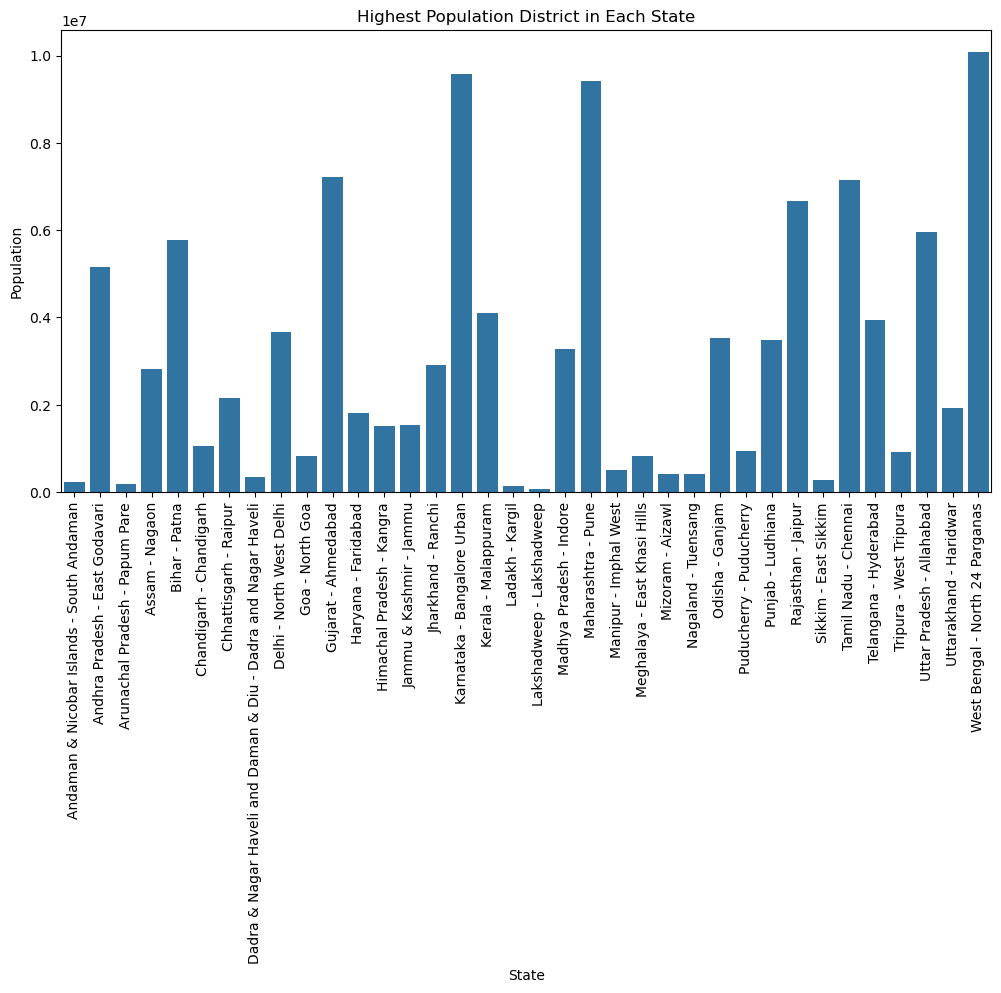

In [112]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State_District', y='Population', data=high_dist_pop)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Highest Population District in Each State')
plt.show()

## 2.5 The average transaction value (ATV) for each state

In [115]:
avg_txn=df_state_txn.groupby('State')['ATV (INR)'].mean()

In [117]:
av=avg_txn.reset_index()

In [119]:
avg=av.set_index('State')

In [121]:
high_av_txn=avg.sort_values(by='ATV (INR)',ascending=False)

### 2.51 Tabular format of ATV for each State

In [124]:
high_av_txn

,ATV (INR)
State,
Ladakh,3408.222984
Andaman & Nicobar Islands,3159.266422
Mizoram,2927.517802
Lakshadweep,2776.118701
Arunachal Pradesh,2638.323985
Manipur,2621.225756
Nagaland,2609.942590
Jammu & Kashmir,2508.506029
Chandigarh,2113.797075


### 2.52 The top 5 states with the highest ATV and the top 5 states with the lowest ATV

In [127]:
print(f"\nThe top 5 states with the highest ATV are:\n\n{high_av_txn.head()}")
print(f"\nThe top 5 states with the lowest ATV are: \n\n{high_av_txn.tail()}")


The top 5 states with the highest ATV are:

                             ATV (INR)
State                                 
Ladakh                     3408.222984
Andaman & Nicobar Islands  3159.266422
Mizoram                    2927.517802
Lakshadweep                2776.118701
Arunachal Pradesh          2638.323985

The top 5 states with the lowest ATV are: 

                                        ATV (INR)
State                                            
Karnataka                             1517.392249
Maharashtra                           1516.361820
Dadra & Nagar Haveli and Daman & Diu  1487.395599
Odisha                                1428.137367
West Bengal                           1373.600590


## 2.6 Analyze app usage trends

### 2.61 The total number of app opens over the years and quarters for each state

In [131]:
state_app_opens=df_state_txn.groupby(['State','Year','Quarter'])['App Opens'].sum().reset_index()

In [133]:
state_app_opens['Year_Quarter'] = state_app_opens['Year'].astype(str) + '_Q' + state_app_opens['Quarter'].astype(str)
state_app_opens = state_app_opens.drop(columns=['Year', 'Quarter'])
print('State wise yearly and quarterly app opens : \n')
state_app_opens

State wise yearly and quarterly app opens : 



,State,App Opens,Year_Quarter
0,Andaman & Nicobar Islands,0,2018_Q1
1,Andaman & Nicobar Islands,0,2018_Q2
2,Andaman & Nicobar Islands,0,2018_Q3
3,Andaman & Nicobar Islands,0,2018_Q4
4,Andaman & Nicobar Islands,0,2019_Q1
...,...,...,...
499,West Bengal,198589332,2020_Q2
500,West Bengal,246554831,2020_Q3
501,West Bengal,291721919,2020_Q4
502,West Bengal,316832674,2021_Q1


### 2.62 line plot showing the number of app opens over time for a Selected state

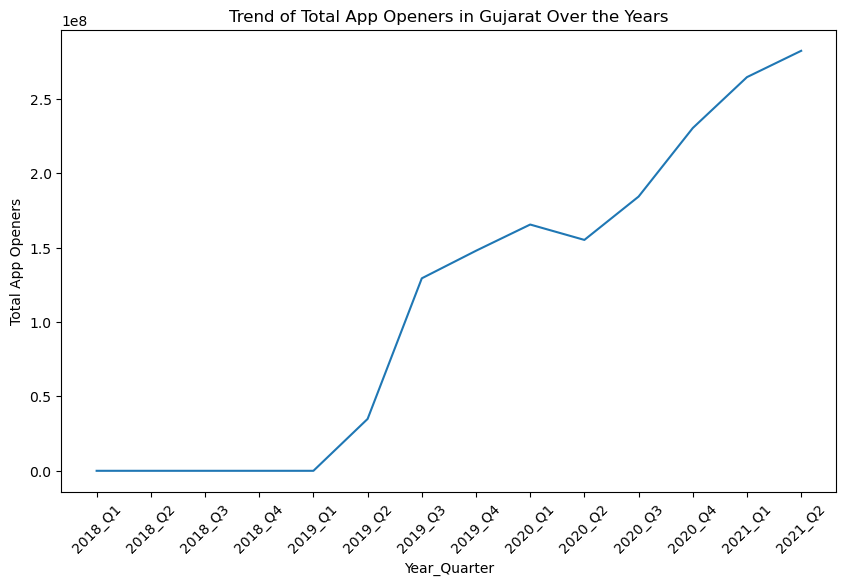

In [136]:
sel_state="Gujarat"
if sel_state in state_app_opens["State"].values:
    data = state_app_opens[state_app_opens["State"] == sel_state]
    plt.figure(figsize=(10,6))
    plt.plot(data['Year_Quarter'],data['App Opens'])
    plt.xlabel("Year_Quarter")
    plt.ylabel("Total App Openers")
    plt.title(f"Trend of Total App Openers in {sel_state} Over the Years")
    plt.xticks(rotation=45)
    plt.show()

## 2.7 Distribution of transaction types

In [139]:
latest_year=df_transc['Year'].max()
latest_quarter=df_transc[df_transc['Year']==latest_year]['Quarter'].max()
state_recent_quarter_transc=df_transc[(df_transc['Year']==latest_year) & (df_transc['Quarter']==latest_quarter)]

In [141]:
state_recent_transc=state_recent_quarter_transc.reset_index(drop=True)

In [143]:
state_high_txntype=state_recent_transc.loc[state_recent_transc.groupby("State")["Transactions"].idxmax(),
    ["State", "Transaction Type", "Transactions"]]

#### the Highest Transaction Type (Transactions)Per State in the recent quarter

In [146]:
state_high_txntype

,State,Transaction Type,Transactions
0,Andaman & Nicobar Islands,Peer-to-peer payments,132772
5,Andhra Pradesh,Peer-to-peer payments,189614879
10,Arunachal Pradesh,Peer-to-peer payments,762946
15,Assam,Peer-to-peer payments,11668399
20,Bihar,Peer-to-peer payments,78694099
25,Chandigarh,Merchant payments,1926913
30,Chhattisgarh,Peer-to-peer payments,18387345
35,Dadra & Nagar Haveli and Daman & Diu,Peer-to-peer payments,843550
40,Delhi,Merchant payments,75620295
45,Goa,Merchant payments,1869384


#### The highest Transaction Type (Transaction Volume )Per State.

In [149]:
state_high_txnvol=state_recent_transc.loc[state_recent_transc.groupby("State")["Amount (INR)"].idxmax(),
    ["State", "Transaction Type", "Amount (INR)"]]

In [151]:
state_high_txnvol

,State,Transaction Type,Amount (INR)
0,Andaman & Nicobar Islands,Peer-to-peer payments,7.483820e+08
5,Andhra Pradesh,Peer-to-peer payments,7.370045e+11
10,Arunachal Pradesh,Peer-to-peer payments,4.000960e+09
15,Assam,Peer-to-peer payments,5.152139e+10
20,Bihar,Peer-to-peer payments,3.197587e+11
26,Chandigarh,Peer-to-peer payments,6.541132e+09
30,Chhattisgarh,Peer-to-peer payments,6.213406e+10
35,Dadra & Nagar Haveli and Daman & Diu,Peer-to-peer payments,2.512913e+09
41,Delhi,Peer-to-peer payments,2.230350e+11
46,Goa,Peer-to-peer payments,6.195032e+09


### 2.71 bar chart showing the distribution of different transaction types for each state for the most recent quarter in the dataset.

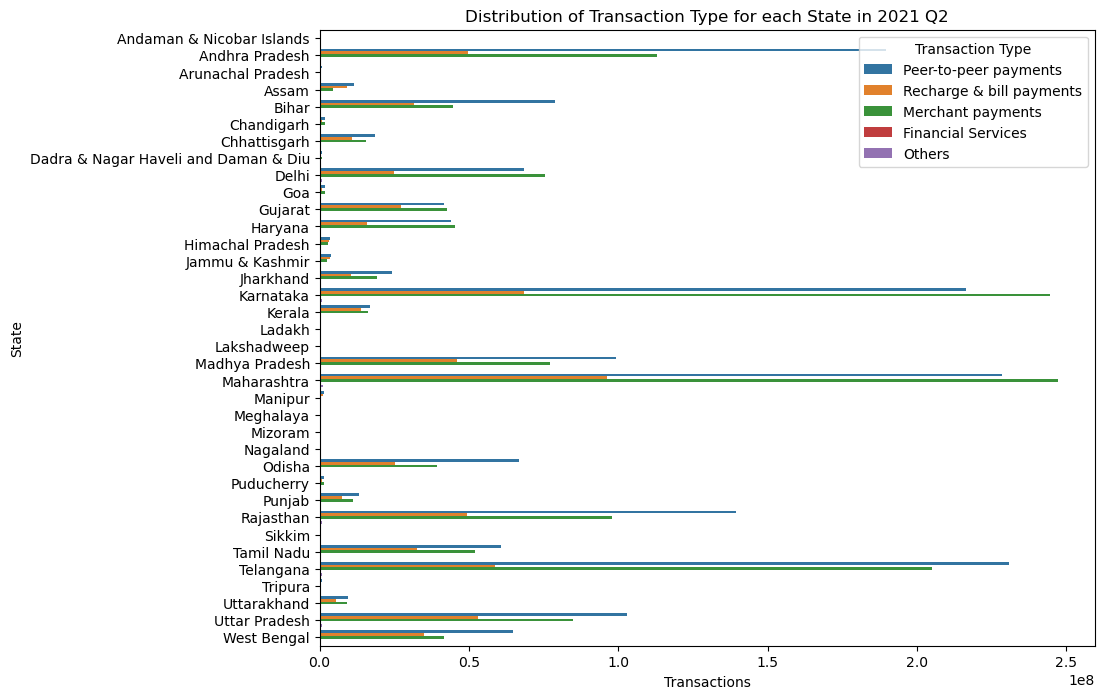

In [154]:
# Bar Chart Plot for Distribution of Transaction Type for each State in 2021 Q2
import seaborn as sns
plt.figure(figsize=(10,8))
sns.barplot(data=state_recent_quarter_transc, y='State', x='Transactions', hue='Transaction Type',orient='h')
plt.xlabel("Transactions")
plt.ylabel("State")
plt.title(f"Distribution of Transaction Type for each State in {latest_year} Q{latest_quarter}")
plt.legend(title="Transaction Type")

plt.show()

## 2.8 unique mapping between district name and district code

In [157]:
unique_dist_mapping=df_dist_cd[['District','Code']].drop_duplicates()

In [513]:
unique_dist_mapping

,District,Code
0,Nicobars,AN01
1,North And Middle Andaman,AN02
2,South Andaman,AN03
42,Anantapur,AP01
43,Chittoor,AP02
...,...,...
9944,Purba Bardhaman,WB19
9945,Purba Medinipur,WB20
9946,Purulia,WB21
9947,South Twenty Four Parganas,WB22


## 2.81 CSV file containing the unique district name and district code mappings

In [515]:
unique_dist_mapping.to_csv("unique_dist_mapping.csv",index=False)

In [159]:
print(f"\nThe unique district mapping csv file :\n\n{unique_dist_mapping}")


The unique district mapping csv file :

                        District  Code
0                       Nicobars  AN01
1       North And Middle Andaman  AN02
2                  South Andaman  AN03
42                     Anantapur  AP01
43                      Chittoor  AP02
...                          ...   ...
9944             Purba Bardhaman  WB19
9945             Purba Medinipur  WB20
9946                     Purulia  WB21
9947  South Twenty Four Parganas  WB22
9948              Uttar Dinajpur  WB23

[732 rows x 2 columns]


## 3. Data Quality Checks

In [162]:
dist_total_transc=df_dist_cd.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum().reset_index()

In [164]:
state_total_transc=df_state_txn.groupby('State')[['Transactions','Amount (INR)','Registered Users']].sum()

In [166]:
comparison_df = pd.merge(dist_total_transc, state_total_transc, on=['State'],suffixes=('_dist', '_state'))

In [168]:
comparison_df['Match_Transactions'] = comparison_df['Transactions_dist'] == comparison_df['Transactions_state']
comparison_df['Match_Amount'] = comparison_df['Amount (INR)_dist']== comparison_df['Amount (INR)_state']
comparison_df['Match_Users'] = comparison_df['Registered Users_dist'] == comparison_df['Registered Users_state']

In [170]:
comparison_df['All_Match'] = comparison_df[['Match_Transactions', 'Match_Amount', 'Match_Users']].all(axis=1)
mismatches = comparison_df[comparison_df['All_Match'] == False]

####  Mismatch is found between state transactions data and district transaction data in column amount

#### Slight decimal variation in the Amount (INR) column, except for the state of Andhra Pradesh (AP).

In [174]:
# Data Quality Check
mismatches

,State,Transactions_dist,Amount (INR)_dist,Registered Users_dist,Transactions_state,Amount (INR)_state,Registered Users_state,Match_Transactions,Match_Amount,Match_Users,All_Match
0,Andaman & Nicobar Islands,1223565,3.641818e+09,408396,1223565,3.641818e+09,408396,True,False,True,False
1,Andhra Pradesh,1781091169,3.860292e+12,158007957,1781091169,3.187847e+12,158007957,True,False,True,False
2,Arunachal Pradesh,8043799,2.225183e+10,1862214,8043799,2.225183e+10,1862214,True,False,True,False
3,Assam,123577981,2.814087e+11,26860751,123577981,2.814087e+11,26860751,True,False,True,False
4,Bihar,713643889,1.639579e+12,115284760,713643889,1.639579e+12,115284760,True,False,True,False
5,Chandigarh,25516542,5.371208e+10,3801466,25516542,5.371208e+10,3801466,True,False,True,False
6,Chhattisgarh,241908549,4.156353e+11,37448388,241908549,4.156353e+11,37448388,True,False,True,False
7,Dadra & Nagar Haveli and Daman & Diu,12462185,1.865878e+10,2701112,12462185,1.865878e+10,2701112,True,False,True,False
8,Delhi,1011031124,1.649942e+12,95374654,1011031124,1.649942e+12,95374654,True,False,True,False
9,Goa,24481604,4.427187e+10,4755320,24481604,4.427187e+10,4755320,True,False,True,False


In [176]:
comparison_df['Match_Amount'] = np.isclose(comparison_df['Amount (INR)_dist'],comparison_df['Amount (INR)_state'],atol=1)

In [178]:
comparison_df['All_Match'] = comparison_df[['Match_Transactions', 'Match_Amount', 'Match_Users']].all(axis=1)
mismatch_2 = comparison_df[comparison_df['All_Match'] == False]

#### One Mismatch is found

In [181]:
mismatch_2

,State,Transactions_dist,Amount (INR)_dist,Registered Users_dist,Transactions_state,Amount (INR)_state,Registered Users_state,Match_Transactions,Match_Amount,Match_Users,All_Match
1,Andhra Pradesh,1781091169,3.860292e+12,158007957,1781091169,3.187847e+12,158007957,True,False,True,False


### 4 Data Merging and Advanced Analysis

#### 4.11 Ratio of users to population by state

In [185]:
state_population = df_dist.groupby('State', as_index=False)['Population'].sum()

In [187]:
merged_df = pd.merge(df_state_txn, state_population, on='State')

In [189]:
#State wise ratio of registered users to population
merged_df['Population_Ratio'] = merged_df['Registered Users'] / merged_df['Population']
merged_df

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens,Population,Population_Ratio
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0,380581,0.017710
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0,380581,0.024712
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0,380581,0.031922
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0,380581,0.039997
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0,380581,0.048862
...,...,...,...,...,...,...,...,...,...,...
499,West Bengal,2020,2,57676797,1.000994e+11,1735.523418,13222022,198589332,92828987,0.142434
500,West Bengal,2020,3,79954504,1.568134e+11,1961.282329,14448366,246554831,92828987,0.155645
501,West Bengal,2020,4,100340645,1.991655e+11,1984.893473,15662093,291721919,92828987,0.168720
502,West Bengal,2021,1,118254052,2.429372e+11,2054.366877,16808799,316832674,92828987,0.181073


#### 4.12 Bar Chart for State wise ratio of registered users to population.

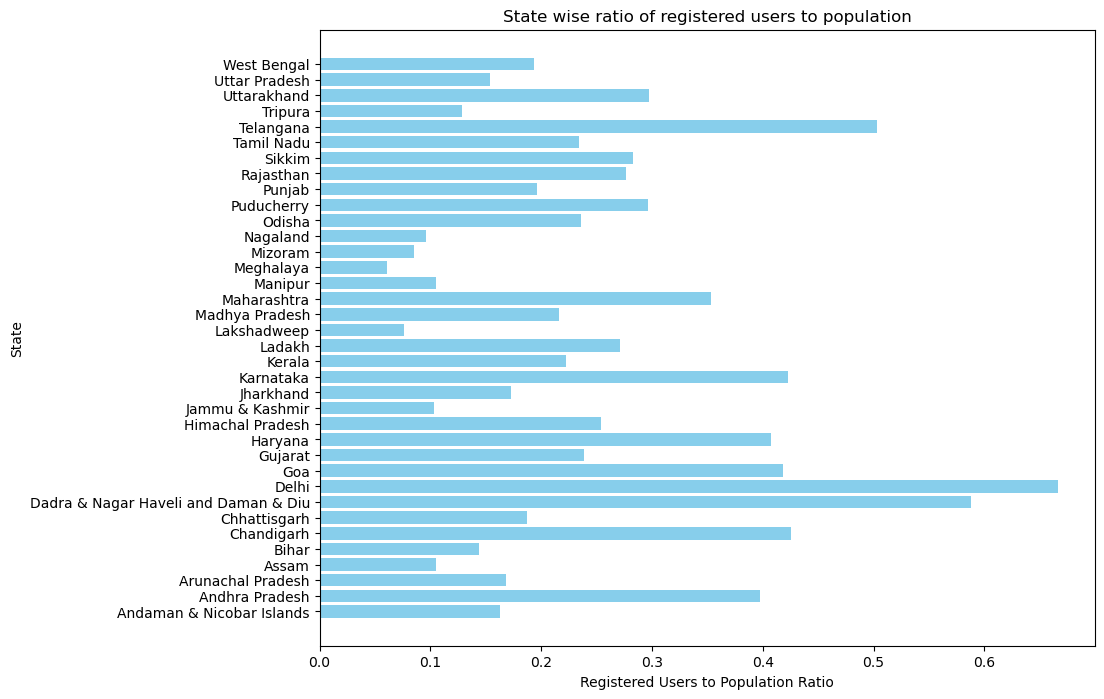

In [192]:
plt.figure(figsize=(10,8))
plt.barh(merged_df['State'], merged_df['Population_Ratio'], color='skyblue')
plt.xlabel("Registered Users to Population Ratio")
plt.ylabel("State")
plt.title("State wise ratio of registered users to population")
plt.show()

### 4.2 Correlate population density with transaction volume

In [194]:
pop_des=pd.merge(df_dist_cd,df_dist,on=('State','District'))

In [197]:
pop_des['Population Density']=pop_des['Population']//pop_des['Area (sq km)']

In [199]:
correlation=pop_des[['Population Density','Transactions']].corr()

In [201]:
correlation

,Population Density,Transactions
Population Density,1.00000,0.31869
Transactions,0.31869,1.00000


#### Scatter Plot visualize the correlation between population density and transaction volume

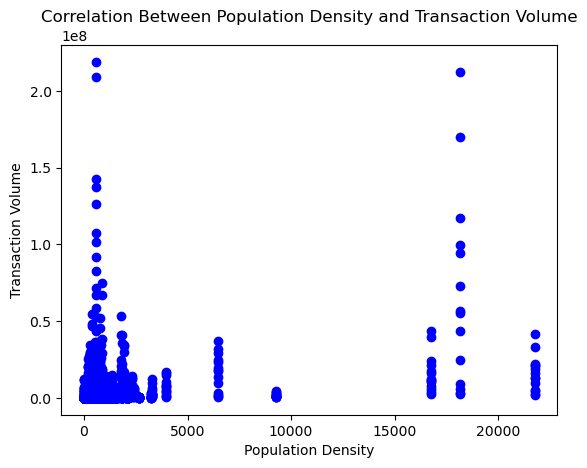

In [204]:
plt.scatter(pop_des['Population Density'], pop_des['Transactions'], color='blue')
plt.xlabel("Population Density")
plt.ylabel("Transaction Volume")
plt.title("Correlation Between Population Density and Transaction Volume")
plt.show()

### 4.3 Average transaction amount per user

In [207]:
avg_transc_per_user=df_state_txn.groupby('State')[['Amount (INR)','Registered Users']].sum()

In [209]:
avg_transc_per_user['Avg transaction per user']=avg_transc_per_user['Amount (INR)']/avg_transc_per_user['Registered Users']

#### 4.31 The average transaction amount per user for each state.

In [212]:
avg_transc_per_user

,Amount (INR),Registered Users,Avg transaction per user
State,,,
Andaman & Nicobar Islands,3.641818e+09,408396,8917.369075
Andhra Pradesh,3.187847e+12,158007957,20175.233763
Arunachal Pradesh,2.225183e+10,1862214,11949.126662
Assam,2.814087e+11,26860751,10476.576498
Bihar,1.639579e+12,115284760,14221.991933
Chandigarh,5.371208e+10,3801466,14129.308175
Chhattisgarh,4.156353e+11,37448388,11098.884128
Dadra & Nagar Haveli and Daman & Diu,1.865878e+10,2701112,6907.815954
Delhi,1.649942e+12,95374654,17299.587909


#### 4.32 Top 5 states of  highest and lowest average transaction per registered user

In [215]:
print(f"\nThe top 5 States of highest average transactions per user are: \n\n{avg_transc_per_user['Avg transaction per user'].nlargest(5)}")
print(f"\nThe top 5 States of Lowest average transactions per user are: \n\n{avg_transc_per_user['Avg transaction per user'].nsmallest(5)}")


The top 5 States of highest average transactions per user are: 

State
Telangana         30653.509622
Karnataka         21474.282206
Andhra Pradesh    20175.233763
Rajasthan         17530.768707
Delhi             17299.587909
Name: Avg transaction per user, dtype: float64

The top 5 States of Lowest average transactions per user are: 

State
Lakshadweep                             5614.898889
Tripura                                 5727.184275
Dadra & Nagar Haveli and Daman & Diu    6907.815954
Kerala                                  7274.846690
Himachal Pradesh                        7317.601442
Name: Avg transaction per user, dtype: float64


### 4.4: Device brand usage ratio

In [218]:
brand_device_users=pd.merge(df_state_txn,df_brand,on=('State'))

In [220]:
brand_device_users.drop_duplicates(inplace=True)

In [222]:
brand_device_users['Device_User_Ratio']=brand_device_users['Registered Users_y']/brand_device_users['Registered Users_x']

In [224]:
dev_ratio=brand_device_users[['State','Registered Users_x','Brand','Registered Users_y','Device_User_Ratio']]

In [226]:
dev_ratio=dev_ratio.rename(columns={'Registered Users_x':'Total_reg_users','Registered Users_y':'Device users'})

#### 4.41 State Wise Device User Ratio by Brand

In [229]:
dev_ratio

,State,Total_reg_users,Brand,Device users,Device_User_Ratio
0,Andaman & Nicobar Islands,6740,Xiaomi,1665,0.247033
1,Andaman & Nicobar Islands,6740,Samsung,1445,0.214392
2,Andaman & Nicobar Islands,6740,Vivo,982,0.145697
3,Andaman & Nicobar Islands,6740,Oppo,501,0.074332
4,Andaman & Nicobar Islands,6740,OnePlus,332,0.049258
...,...,...,...,...,...
77611,West Bengal,17979979,Lenovo,350841,0.019513
77612,West Bengal,17979979,Asus,297579,0.016551
77613,West Bengal,17979979,Huawei,272965,0.015182
77614,West Bengal,17979979,Apple,201393,0.011201


#### 4.42 Bar Chart (State Wise Device User Ratio by Brand)

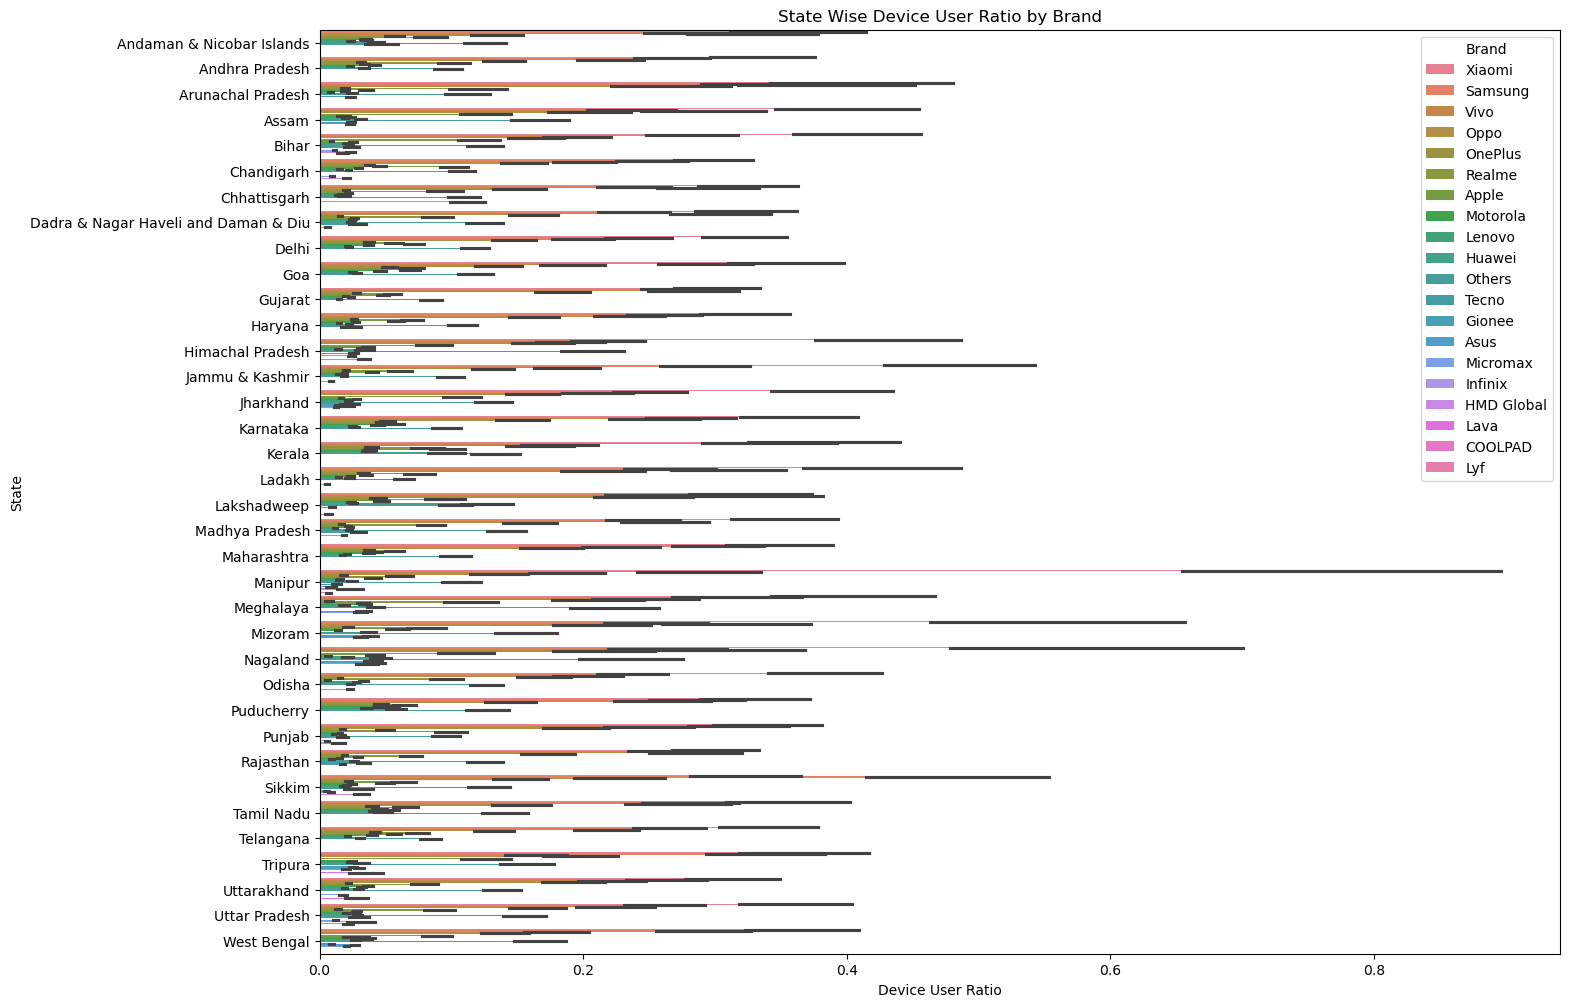

In [232]:
plt.figure(figsize=(16, 12))
sns.barplot(data=dev_ratio, x='Device_User_Ratio', y='State', hue='Brand', dodge=True, width=0.9)  
plt.xlabel('Device User Ratio')  
plt.ylabel('State')  
plt.title('State Wise Device User Ratio by Brand')  
plt.legend(title='Brand')  
plt.show()

### 5: Data Visualization

In [234]:
my_state='Andhra Pradesh'

my_state_transc=df_state_txn[df_state_txn['State']==my_state]

ap_transc=my_state_transc.groupby(['Year','Quarter'])[['Transactions','Amount (INR)']].sum().reset_index()

In [235]:
#Transactions & Amount Over Time in AP state
ap_transc['Year_Quarter']=ap_transc['Year'].astype(str)+"-Q"+ap_transc['Quarter'].astype(str)
ap_transc.set_index('Year_Quarter')

,Year,Quarter,Transactions,Amount (INR)
Year_Quarter,,,,
2018-Q1,2018,1,9039585,1.199628e+10
2018-Q2,2018,2,12353918,2.288391e+10
2018-Q3,2018,3,25626061,3.571804e+10
2018-Q4,2018,4,30759548,5.147378e+10
2019-Q1,2019,1,57264522,8.376060e+10
2019-Q2,2019,2,56409015,1.136345e+11
2019-Q3,2019,3,76288614,1.394479e+11
2019-Q4,2019,4,107218103,2.009483e+11
2020-Q1,2020,1,127677357,2.527372e+11


### 5.1 Total Transactions and amount over time of AP State

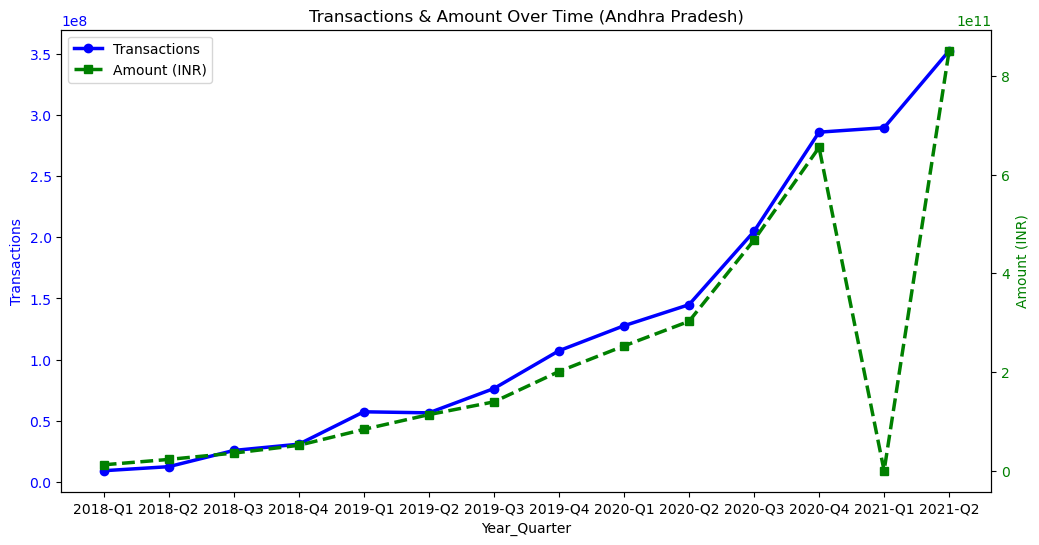

In [239]:
fig, ax1 = plt.subplots(figsize=(12, 6))  
line_1=ax1.plot(ap_transc['Year_Quarter'], ap_transc['Transactions'], marker='o', color='b', linewidth=2.5, label='Transactions')  
ax1.set_xlabel('Year_Quarter')  
ax1.set_ylabel('Transactions', color='b')  
ax1.tick_params(axis='y', labelcolor='b')  
ax1.set_title('Transactions & Amount Over Time (Andhra Pradesh)')

ax2 = ax1.twinx()  
line_2=ax2.plot(ap_transc['Year_Quarter'], ap_transc['Amount (INR)'], marker='s', linestyle='--', color='g', linewidth=2.5, label='Amount (INR)')  
ax2.set_ylabel('Amount (INR)', color='g')  
ax2.tick_params(axis='y', labelcolor='g') 

lines = line_1 + line_2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')
plt.xticks(rotation=45)

plt.show()

### 5.2 pie chart showing the distribution of transaction types for a specific quarter

In [245]:
sel_state='Telangana'
quart= 2
ttl_transc=df_transc[df_transc['State']==sel_state]
ttl_2ndquart_transc=df_transc[df_transc['Quarter']==quart].groupby('Transaction Type')['Transactions'].sum()

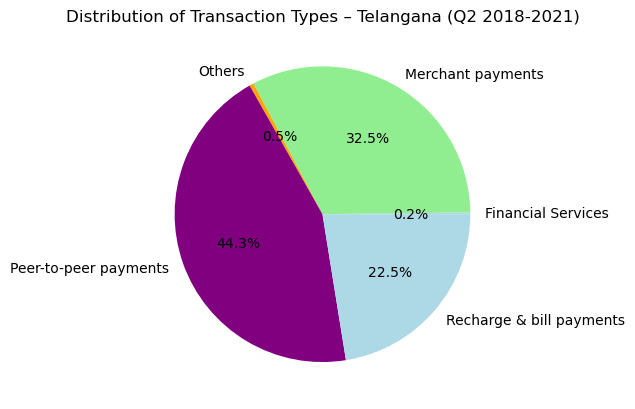

In [247]:
# Pie Chart
plt.pie(ttl_2ndquart_transc, labels=ttl_2ndquart_transc.index, autopct='%1.1f%%',colors=['lightblue', 'lightgreen', 'orange', 'purple'])
plt.title("Distribution of Transaction Types – Telangana (Q2 2018-2021)")
plt.show()

#### 5.3 Visualize the population density of districts in a selected state

In [250]:
#Population Density by District in AP State
ap_pop_density=pop_des[pop_des['State']==my_state]

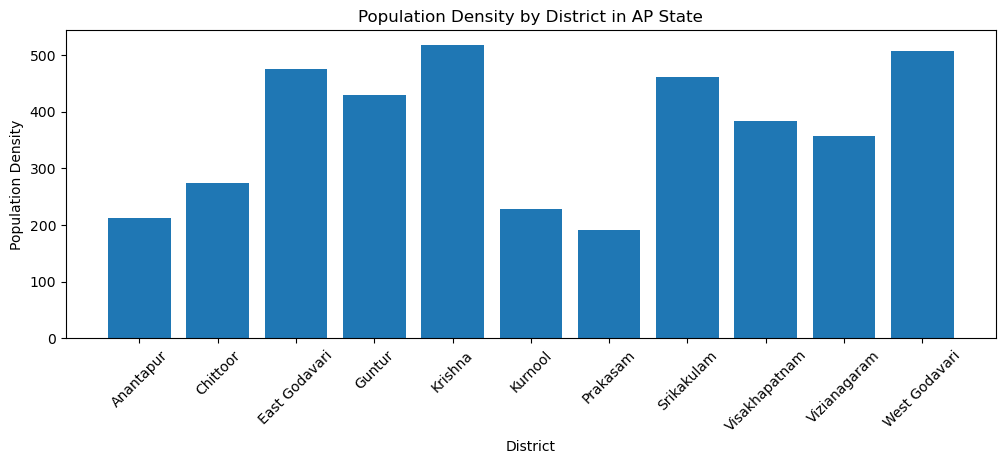

In [252]:
# Bar Chart
plt.figure(figsize=(12,4))
plt.bar(ap_pop_density['District'],ap_pop_density['Population Density'])
plt.xlabel("District")
plt.ylabel("Population Density")
plt.title("Population Density by District in AP State")
plt.xticks(rotation=45)
plt.show()

### 6. Insights and Conclusion

### 6.1: Identify any trend or pattern in the transaction data

In [256]:
state_trend=df_state_txn.groupby(['State','Year','Quarter'])['Transactions'].sum().reset_index()

In [258]:
state_trend['Year_Quarter']=state_trend['Year'].astype(str)+"_Q"+state_trend['Quarter'].astype(str)

In [260]:
state_trend

,State,Year,Quarter,Transactions,Year_Quarter
0,Andaman & Nicobar Islands,2018,1,6658,2018_Q1
1,Andaman & Nicobar Islands,2018,2,11340,2018_Q2
2,Andaman & Nicobar Islands,2018,3,16265,2018_Q3
3,Andaman & Nicobar Islands,2018,4,23758,2018_Q4
4,Andaman & Nicobar Islands,2019,1,30486,2019_Q1
...,...,...,...,...,...
499,West Bengal,2020,2,57676797,2020_Q2
500,West Bengal,2020,3,79954504,2020_Q3
501,West Bengal,2020,4,100340645,2020_Q4
502,West Bengal,2021,1,118254052,2021_Q1


In [262]:
states= state_trend['State'].unique()
states

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli and Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [264]:
state_wise_data={}

for state in states:
    state_data=state_trend[state_trend['State']==state]
    state_wise_data[state]=state_data

### Total Transactions trend over years for each district

C:\Users\91949\AppData\Local\Temp\ipykernel_13780\1549566381.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(state_data["Year_Quarter"], rotation=45)
C:\Users\91949\AppData\Local\Temp\ipykernel_13780\1549566381.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(state_data["Year_Quarter"], rotation=45)
C:\Users\91949\AppData\Local\Temp\ipykernel_13780\1549566381.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(state_data["Year_Quarter"], rotation=45)
C:\Users\91949\AppData\Local\Temp\ipykernel_13780\1549566381.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_x

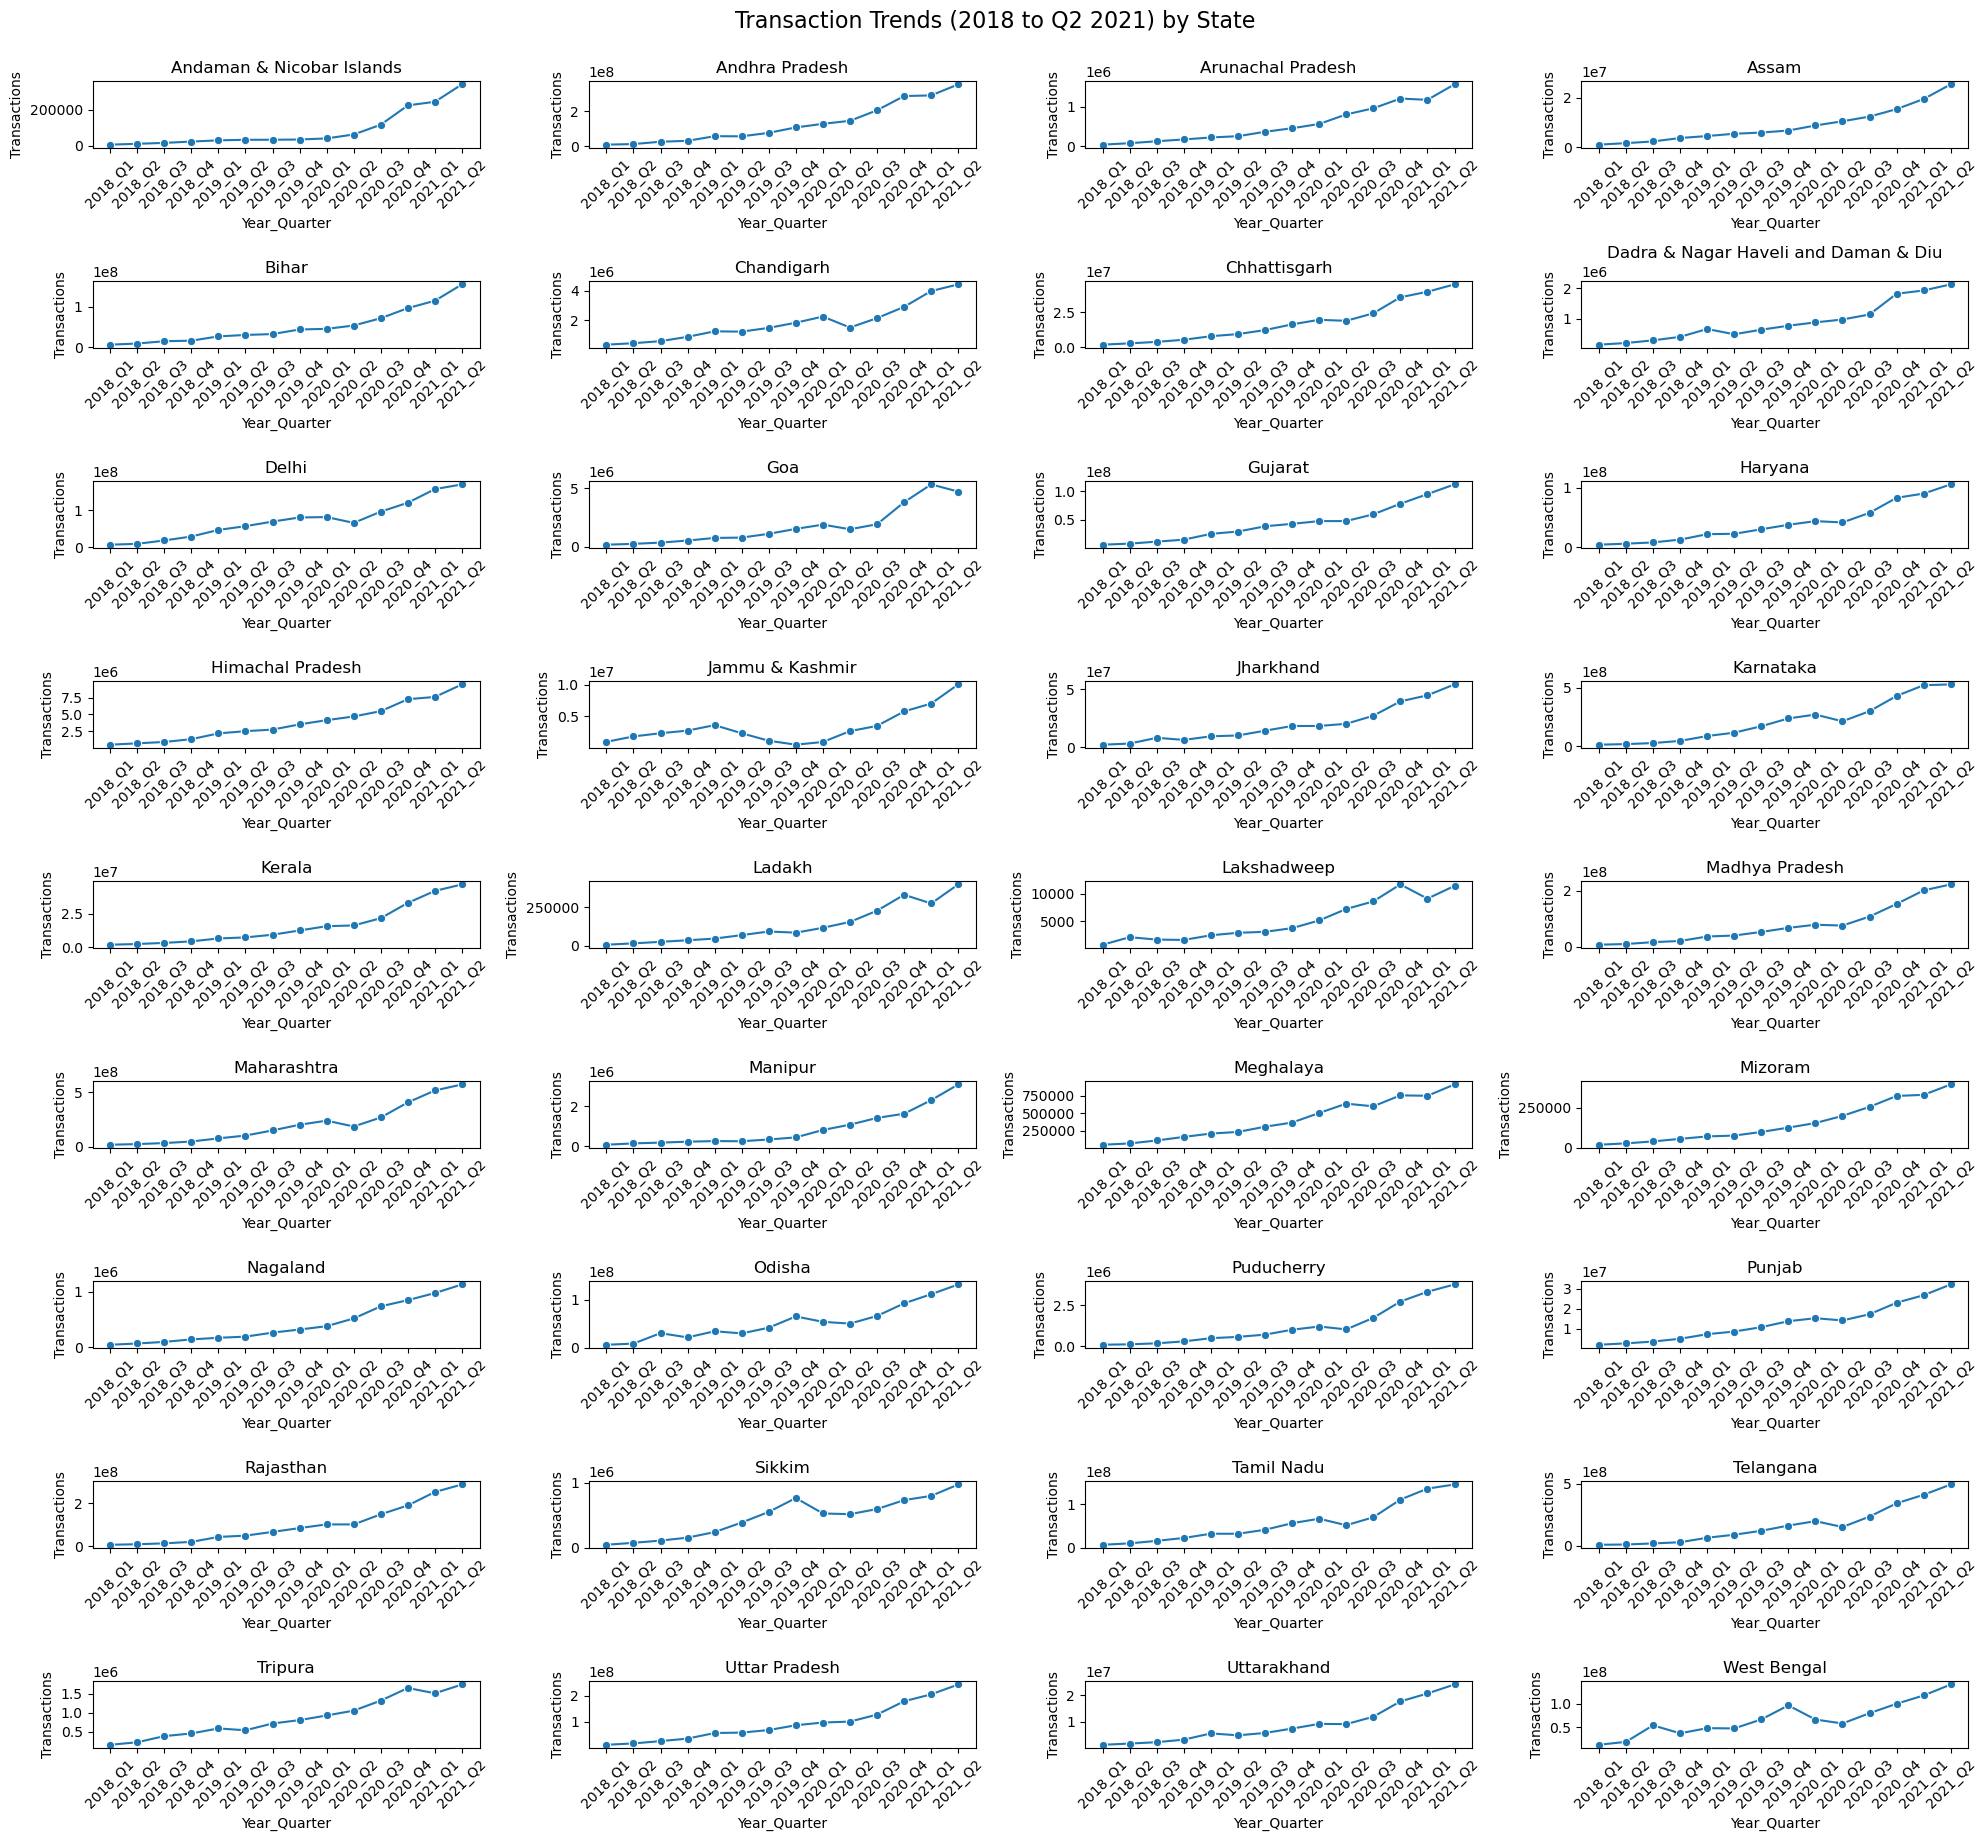

In [1158]:
fig, axes = plt.subplots(9,4, figsize=(20, 18))
axes = axes.flatten()
for i, (state, state_data) in enumerate(state_wise_data.items()):
    sns.lineplot(
        data=state_data, 
        x="Year_Quarter", 
        y="Transactions", 
        marker="o", 
        ax=axes[i])

    axes[i].set_title(state, fontsize=12) 
    axes[i].set_xticklabels(state_data["Year_Quarter"], rotation=45)

plt.tight_layout()
plt.suptitle("Transaction Trends (2018 to Q2 2021) by State", fontsize=16, y=1.02)
plt.show()

In [267]:
yearly_transc = df_state_txn.pivot_table(index='State',columns='Year',values='Transactions',aggfunc='sum')

In [271]:
yearly_transc.sort_values(by=2018,ascending=True,inplace=True)

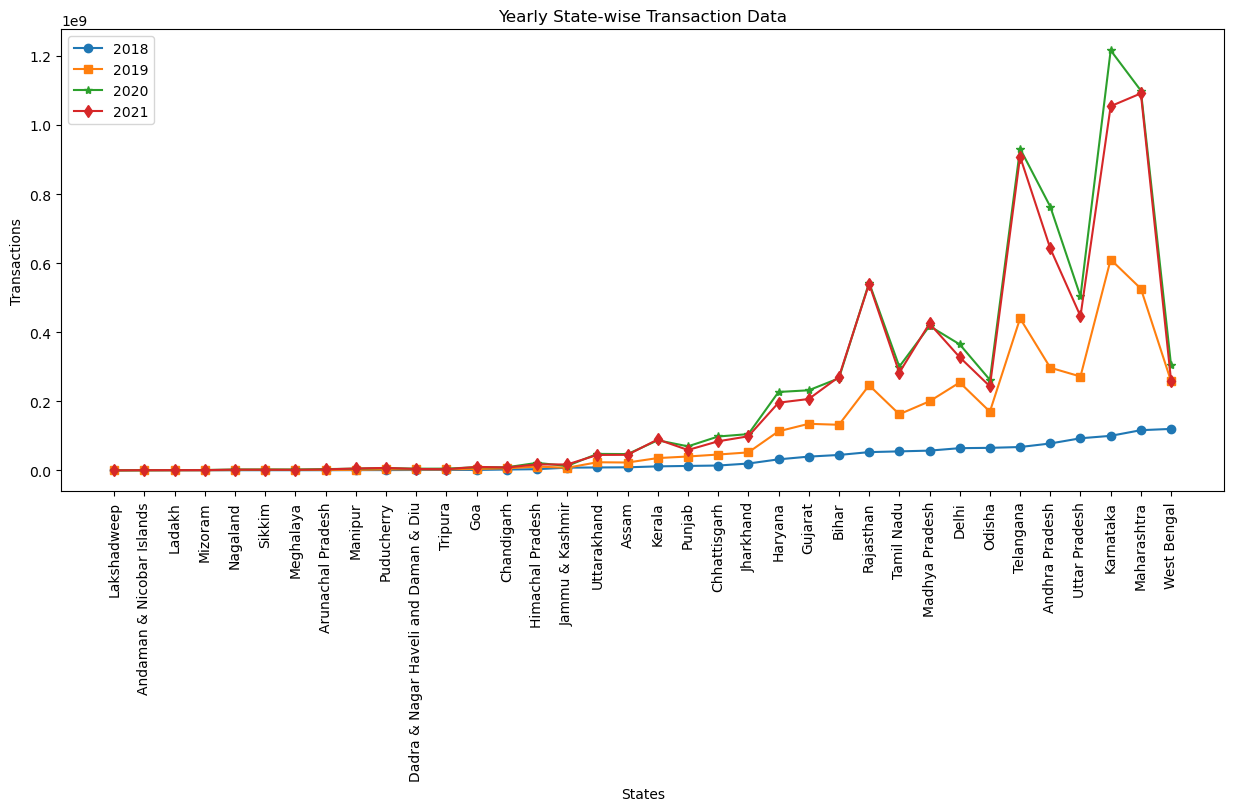

In [279]:
plt.figure(figsize=(15,6))
plt.plot(yearly_transc[2018].index,yearly_transc[2018].values,marker='o',label='2018')
plt.plot(yearly_transc[2019].index,yearly_transc[2019].values,marker='s',label='2019')
plt.plot(yearly_transc[2020].index,yearly_transc[2020].values,marker='*',label='2020')
plt.plot(yearly_transc[2021].index,yearly_transc[2021].values,marker='d',label='2021')
plt.title("Yearly State-wise Transaction Data")
plt.xlabel("States")
plt.ylabel("Transactions")

plt.legend()
plt.xticks(rotation=90)
plt.show()

In [321]:
cor_2=pop_des[['Population Density','Transactions']].corr()

In [323]:
cor_2

,Population Density,Transactions
Population Density,1.00000,0.31869
Transactions,0.31869,1.00000


### Observations from  State level transactions and users:

### Insights from State level Transactions:

### Insights from Transactions Trend:

### Insights from State level Trnasaction Types in the recent quarter:

### Insights from Average Transaction Per State:

### Insights fron Average Transactions per REGISTERED USERS:

In [ ]:
Highest in Telangana, Krantaka and Andhra Pradesh due to high digital adoption and highest population

#### Insights from App opens and Registered Users:

### Insights from State wise of Registered users to Population:

### Insights from Correlation Between Population Density& Transactions:

### Insights from Devise Users by brand per state: